In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import make_circles

In [0]:
def plot_clusters(points, cluster_labels, offset=0.01, show_annotation=True):
    cluster_labels = np.array(cluster_labels)
    un_clusters = np.unique(cluster_labels)
    
    points = np.array(points)
    
    for cluster in un_clusters:
        plt.scatter(points[cluster_labels == cluster, 0],points[cluster_labels == cluster, 1], label=cluster)
    
    if show_annotation:
        for i in range(points.shape[0]):
            plt.annotate(i, (points[i,0]+offset, points[i,1]+offset))

 

    plt.legend()

In [0]:
np.random.seed(2)
points = np.vstack((np.random.normal(0,0.5,size=(4,2)),np.random.normal(3,0.5,size=(4,2))))
points = np.vstack((points, np.array([[1.5,1.5]])))
points = np.vstack((points, np.array([[1.25,1.25]])))

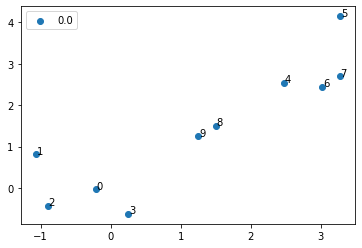

In [4]:
cluster_labels = np.zeros((10))
offset = 0.05

plot_clusters(points, cluster_labels)
plt.show()

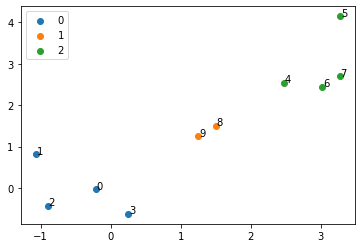

In [5]:
cluster_labels2 = np.array([0,0,0,0,2,2,2,2,1,1])
offset = 0.05

plot_clusters(points, cluster_labels2)
plt.show()

In [0]:
def heatmap(grid, xlabels, ylabels, xrot=90):   
    cmap = cm.get_cmap("viridis")
    plt.imshow(grid, cmap=cmap)
    plt.xticks(np.arange(0,grid.shape[1],step=1), xlabels, rotation=xrot)
    plt.yticks(np.arange(0, grid.shape[0], step=1), ylabels)

Task1: ​ Run the kmeans multiple times and see if averaging the cluster centers across runs
helps to reduce dependency on initialisation. Here the assumption is that good clustering is
more likely than bad one. Dataset: The 5 clusters

#K Means

In [0]:
class kMeans:

  def __init__(self,  points, k, center_points = []):
    self.k = k
    self.points = points
    self.init_centers(center_points)

  def init_centers(self, center_points):
    if len(center_points) == 0:
      self.center_points =  self.points[np.random.choice(len(self.points), self.k, replace = False)]
      return self.center_points
      
    self.center_points = center_points
    return self.center_points 

  def recalculate_cluster_center_points(self):
    center_points = np.zeros((self.k,2))
    for i in range(self.k):
      kth_cluster = self.points[self.classes == i]
      center_points[i] = kth_cluster.mean(axis = 0)
    self.center_points = center_points
    return center_points

  def assign(self):
    d = euclidean_distances(self.points, self.center_points)
    self.classes = np.argmin(d, axis = 1)
    return self.classes
  
  def fit(self):
    initial_center_points = self.center_points.copy()
    prev_center_points = np.zeros(self.center_points.shape)

    while not (prev_center_points == self.center_points).all():
      prev_center_points = self.center_points.copy()
      self.assign()
      self.recalculate_cluster_center_points()
    return self.classes

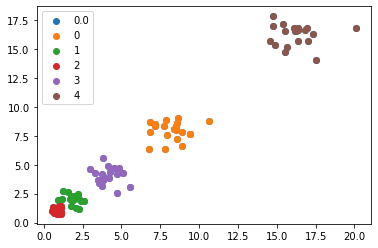

In [9]:
np.random.seed(2)
K = 5
X = []
for i in range(5):
    X.append(np.random.normal(2**i,(i+1)/5, size=(20,2)))
points = np.vstack(X)
plot_clusters(points, np.zeros((points.shape[0])), show_annotation=False)

kmeans = kMeans(points, 5)
labels = kmeans.fit()
plot_clusters(points, labels, show_annotation=False)

Task2:​ Run the algorithm on concentric circles dataset in r-theta space or some other space
you like.

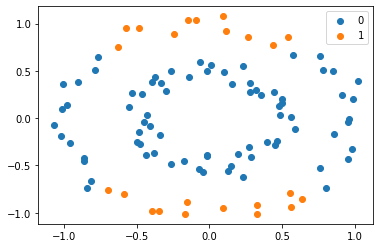

In [11]:
points, b = make_circles(100, noise=0.06, factor=0.5)
kmeans = kMeans(points**2, 2)
labels = kmeans.fit()
plot_clusters(points, labels, show_annotation = False)